## Problem Statement

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective ways to reach out to people. However, they require huge investment as large call centres are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call. You are provided with the client data such as age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, is to predict if the client will subscribe to a term deposit.

### Data Dictonary
| Variable | Definition |
| --- | --- |
| ID | Unique Client ID |
| age | Age of the client |
| job | Type of job |
| marital | Marital status of the client |
| education | Education level |
| default | Credit in default |
| default | Housing loan |
| default | Personal loan |
| contact | Type of communication |
| month | Contact month |
| day_of_week | Day of week of contact |
| duration | Contact duration |
| campaign | number of contacts performed during this campaign to the client |
| pdays | number of days that passed by after the client was last contacted |
| previous | number of contacts performed before this campaign |
| poutcome | outcome of the previous marketing campaign |
| Subscribed (target) | has the client subscribed a term deposit? |


### 1-Importing necessary library files

In [14]:
import pandas as pd
import numpy as np                     
import seaborn as sns                  
import matplotlib.pyplot as plt 
import seaborn as sn                   
%matplotlib inline
import warnings                        
warnings.filterwarnings("ignore")

### 2- Datasets-

In [15]:
# loading the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [16]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [17]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [18]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [19]:
train.shape, test.shape

((31647, 18), (13564, 17))

Test dataset contents have less data compared to the Training dataset and does not have subscribed column because it is the target variable. We will predict whether the client will subscribe to Term Deposit or not.

### 3- Univariate Analysis-

Univariate analysis is a basic kind of analysis technique for statistical data. Here the data contains just one variable and have to deal with the relationship of a cause and effect.

In [20]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [21]:
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

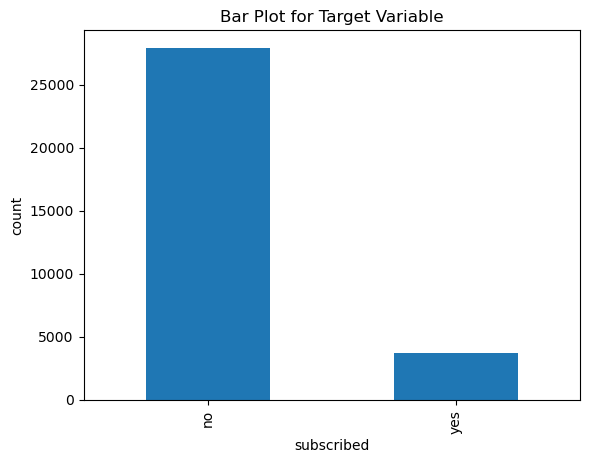

In [22]:
train['subscribed'].value_counts().plot.bar()
plt.title('Bar Plot for Target Variable')
plt.xlabel('subscribed')
plt.ylabel('count')
plt.show()

Only 3715 users from  31647 have subscribed which is around 12%.

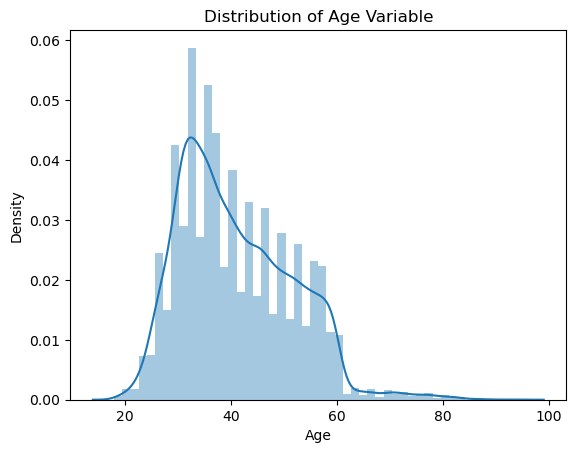

In [23]:
sn.distplot(train["age"], )
plt.title("Distribution of Age Variable")
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

Most of the clients the age group between 20-60.

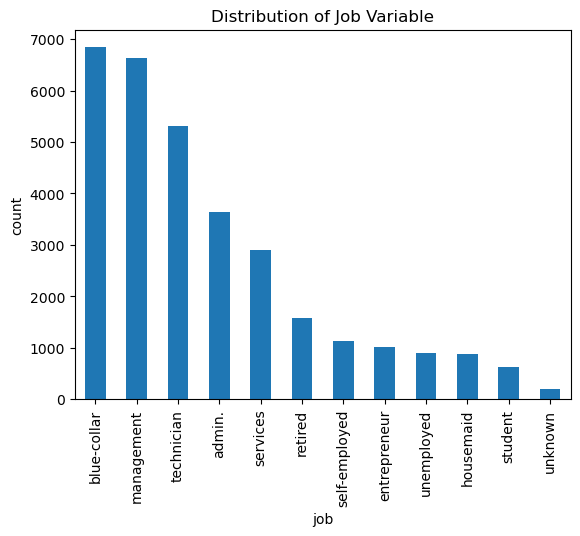

In [24]:
train['job'].value_counts().plot.bar()
plt.title("Distribution of Job Variable")
plt.xlabel('job')
plt.ylabel('count')
plt.show()

Most of the clients belong to blue-collar jobs and the students are least in number as students generally term deposit.

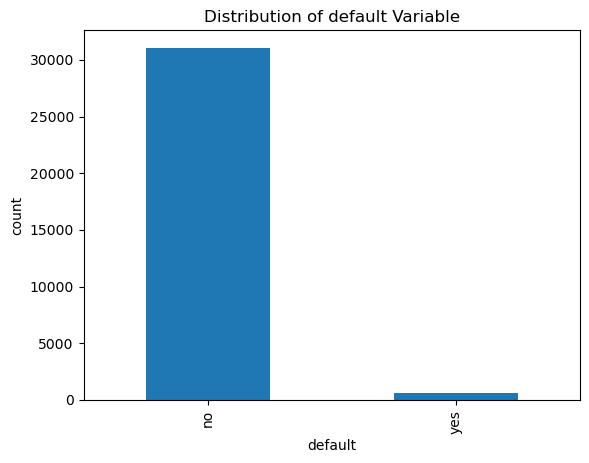

In [25]:
train['default'].value_counts().plot.bar()
plt.title("Distribution of default Variable")
plt.xlabel('default')
plt.ylabel('count')
plt.show()

## 4- Bivariate Analysis -

Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them.

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

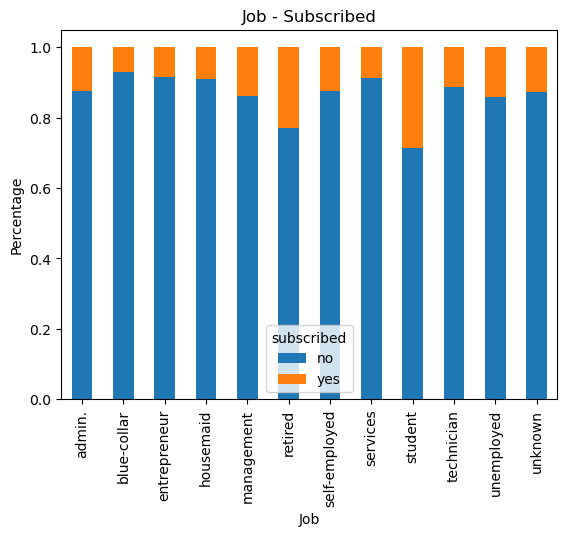

In [26]:
print(pd.crosstab(train['job'],train['subscribed']))
job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,)
plt.title("Job - Subscribed")
plt.xlabel('Job')
plt.ylabel('Percentage')

Students and Retired people have higher chances of subscribing to a term deposit, But students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.


subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

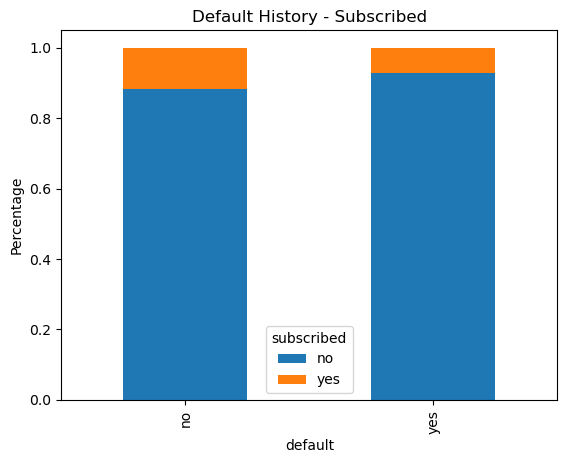

In [31]:
print(pd.crosstab(train['default'],train['subscribed']))
default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Default History - Subscribed")
plt.xlabel('default')
plt.ylabel('Percentage')

Clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have Previous default history.

In [32]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

<AxesSubplot: title={'center': 'Correlation'}>

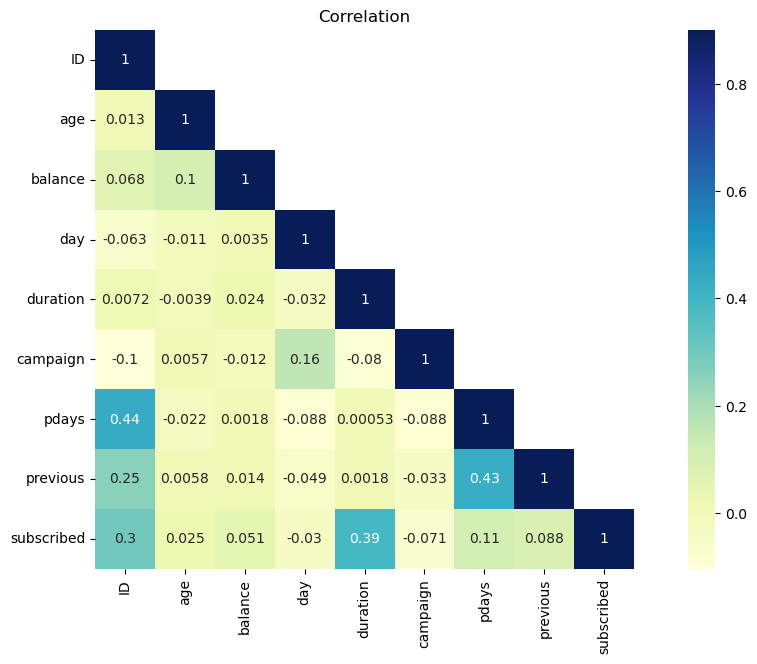

In [33]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(14,7)
ax.set_title("Correlation")
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

The duration of the call is highly correlated with the target variable. This can be verified as well. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to the term deposit.

In [34]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

## 5- Model Building and Prediction-

In [35]:
target = train['subscribed']
train = train.drop('subscribed',1)

In [36]:
train = pd.get_dummies(train)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

## Logistic Regression
Logistic regression is used for classification problems. A logistic regression model is built and its accuracy is checked as evaluation metric for this problem is accuracy.

In [39]:
from sklearn.linear_model import LogisticRegression

In [48]:
lreg = LogisticRegression()

In [49]:
lreg.fit(X_train,y_train)

LogisticRegression()

In [42]:
prediction = lreg.predict(X_val)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
# calculating the accuracy score
accuracy_score(y_val, prediction)

0.8864139020537125

## Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [52]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [53]:
predict = clf.predict(X_val)

In [54]:
accuracy_score(y_val, predict)

0.9042654028436019

In [55]:
test = pd.get_dummies(test)

In [56]:
test_prediction = clf.predict(test)

In [57]:
# creating a Business_Sourced column and saving the predictions in it
submission=pd.DataFrame()
submission['ID'] = test['ID']
submission['subscribed'] = test_prediction

In [58]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [59]:
submission.to_csv('submission.csv', header=True, index=False)

Predictions are made on the Test data set and are stored in a .csv file.
